In [1]:
import pandas as pd


In [2]:
TOI_df = pd.read_csv('NHLTotTime.csv')
TOI_df.head()

,Unnamed: 0,PLAYER,TEAM,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POS,hr,min,sec,TIMES
0,0,Suter Ryan,MIN,82.0,7,40,47,-8,26:42:00,2222,27.1,46:34:00,D,26.0,42.0,0.0,2132.0
1,1,Doughty Drew,LA,82.0,8,37,45,-34,26:36:00,2393,29.2,48:27:00,D,26.0,36.0,0.0,2132.0
2,2,Letang Kris,PIT,65.0,16,40,56,13,25:58:00,1923,29.6,30:07:00,D,25.0,58.0,0.0,1625.0
3,3,Jones Seth,CBJ,75.0,9,37,46,1,25:49:00,2214,29.5,42:06:00,D,25.0,49.0,0.0,1875.0
4,4,Josi Roman,NSH,82.0,15,41,56,9,25:10:00,2359,28.8,36:51:00,D,25.0,10.0,0.0,2050.0


In [3]:
timelist = list(TOI_df['TOI/G'])
# timelist

In [465]:
#Convert the 
for i in range(len(TOI_df['TOI/G'])):
    timesplit = timelist[i].split(':')
    
    
    whole = int(timesplit[0])
    decimal = int(timesplit[1])/60
    
    minutes = whole + decimal
    
    TOI_df['TOI/G'][i] = minutes

C:\Users\ulyss\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
# for i in range(len(TOI_df['TOI/G'])):
#     print(i)

In [56]:
TOI_df.head()

,Unnamed: 0,PLAYER,TEAM,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POS,hr,min,sec,TIMES
0,0,Suter Ryan,MIN,82.0,7,40,47,-8,26.7,2222,27.1,46:34:00,D,26.0,42.0,0.0,2132.0
1,1,Doughty Drew,LA,82.0,8,37,45,-34,26.6,2393,29.2,48:27:00,D,26.0,36.0,0.0,2132.0
2,2,Letang Kris,PIT,65.0,16,40,56,13,25.9667,1923,29.6,30:07:00,D,25.0,58.0,0.0,1625.0
3,3,Jones Seth,CBJ,75.0,9,37,46,1,25.8167,2214,29.5,42:06:00,D,25.0,49.0,0.0,1875.0
4,4,Josi Roman,NSH,82.0,15,41,56,9,25.1667,2359,28.8,36:51:00,D,25.0,10.0,0.0,2050.0


In [54]:
NHL_stats = TOI_df[['PLAYER', 'GP', 'TOI/G']]
# NHL_stats

# Logistic Regression

In [258]:
pd.read_csv('NHLModel.csv').head()

,Unnamed: 0,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status
0,0,LW,74.0,214,Abdelkader Justin,32,Injured
1,1,LW,71.0,196,Aberg Pontus,25,Injured
2,2,RW,69.0,171,Abramov Vitaly,21,Not Injured
3,3,C,70.0,205,Acciari Noel,27,Not Injured
4,4,LW,72.0,199,Agostino Kenny,27,Not Injured


In [436]:
# NHL_1 = pd.read_csv('NHLModel.csv')
# NHL = NHL_1[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'Injury Status']]
# NHL = NHL.dropna()
# NHL.head()

In [437]:
NHL_1 = pd.read_csv('NHLModel.csv')

NHL_select = NHL_1[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'Injury Status']]

#Merge Playerr Bio data with the player stat data 
NHL = NHL_select.merge(NHL_stats, how='right', on='PLAYER')
NHL = NHL.dropna()
# NHL

In [438]:
#Create BMI column
NHL['BMI'] = (NHL['WEIGHT'] / (NHL['HEIGHT'] ** 2)) * 703

In [439]:
NHL.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status,GP,TOI/G,BMI
0,LW,74.0,214.0,Abdelkader Justin,32.0,Injured,71.0,15.4,27.472973
1,LW,71.0,196.0,Aberg Pontus,25.0,Injured,59.0,14.6,27.333466
2,RW,69.0,171.0,Abramov Vitaly,21.0,Not Injured,1.0,13.8667,25.249527
3,C,70.0,205.0,Acciari Noel,27.0,Not Injured,72.0,12.9833,29.411224
4,LW,72.0,199.0,Agostino Kenny,27.0,Not Injured,63.0,12.9167,26.986304


In [440]:
# 1 = injured
# 0 = not injured
Encoded_df = pd.get_dummies(NHL, columns=['Injury Status'])[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'GP', 'TOI/G','BMI', 'Injury Status_Injured']]
Encoded_df.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,GP,TOI/G,BMI,Injury Status_Injured
0,LW,74.0,214.0,Abdelkader Justin,32.0,71.0,15.4,27.472973,1
1,LW,71.0,196.0,Aberg Pontus,25.0,59.0,14.6,27.333466,1
2,RW,69.0,171.0,Abramov Vitaly,21.0,1.0,13.8667,25.249527,0
3,C,70.0,205.0,Acciari Noel,27.0,72.0,12.9833,29.411224,0
4,LW,72.0,199.0,Agostino Kenny,27.0,63.0,12.9167,26.986304,0


In [441]:
# y = Encoded_df['Injury Status_Injured'].values.reshape(-1, 1)
import numpy as np
y = np.array(Encoded_df['Injury Status_Injured'])


In [442]:
# y

# Train Test Split

In [443]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(NHL, columns=[‘POSITION’,‘Injury Status’])

# X = pd.get_dummies(Encoded_df[['POSITION', 'HEIGHT', 'WEIGHT', 'AGE', 'GP', 'TOI/G','BMI']], columns=['POSITION'])
X = Encoded_df[['HEIGHT', 'WEIGHT', 'AGE', 'GP', 'TOI/G','BMI']]
New_X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(New_X, y, train_size=0.75)

# X_train.head()

C:\Users\ulyss\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [444]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [445]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [446]:
classifier.predict([X_test[12]])

array([0], dtype=uint8)

In [447]:
classifier.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=uint8)

In [448]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5799086757990868
Testing Data Score: 0.6118721461187214


# K Nearest Neighbor

In [449]:
# from sklearn.model_selection import train_test_split

# # X = pd.get_dummies(NHL, columns=[‘POSITION’,‘Injury Status’])

# X = pd.get_dummies(Encoded_df[['POSITION', 'HEIGHT', 'WEIGHT', 'AGE']], columns=['POSITION'])
# New_X = np.array(X)

# X_train, X_test, y_train, y_test = train_test_split(New_X, y, train_size=0.75)

# # X_train.head()

In [450]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

# X_scaler = StandardScaler().fit_transform(X_train)



C:\Users\ulyss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [451]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\ulyss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


k: 1, Train/Test Score: 1.000/0.676
k: 3, Train/Test Score: 0.866/0.735
k: 5, Train/Test Score: 0.831/0.753
k: 7, Train/Test Score: 0.813/0.753
k: 9, Train/Test Score: 0.804/0.758
k: 11, Train/Test Score: 0.784/0.758
k: 13, Train/Test Score: 0.778/0.767
k: 15, Train/Test Score: 0.770/0.763
k: 17, Train/Test Score: 0.772/0.772
k: 19, Train/Test Score: 0.763/0.772
k: 21, Train/Test Score: 0.760/0.763
k: 23, Train/Test Score: 0.760/0.763
k: 25, Train/Test Score: 0.758/0.758
k: 27, Train/Test Score: 0.761/0.767
k: 29, Train/Test Score: 0.761/0.772
k: 31, Train/Test Score: 0.753/0.776
k: 33, Train/Test Score: 0.749/0.772
k: 35, Train/Test Score: 0.749/0.767
k: 37, Train/Test Score: 0.749/0.781
k: 39, Train/Test Score: 0.749/0.781


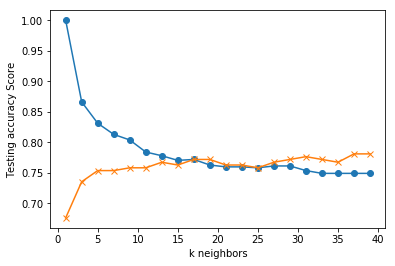

In [452]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [453]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.758


In [454]:
print(len(X_train))

657


In [460]:
import math

# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

k = int( math.sqrt(len(X_train)))

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 25, Train/Test Score: 0.772/0.772


In [461]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [462]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[103,  15],
       [100,   1]], dtype=int64)

## F1 Score

In [463]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.017094017094017096

## Accuracy Score

In [464]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4748858447488584

In [238]:
NHL['Injury Status'].value_counts()

Not Injured    484
Injured        392
Name: Injury Status, dtype: int64

In [239]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [240]:
X_test

array([[71.0, 186.0, 29.0, 82.0, 14.2, 25.938901011704026],
       [75.0, 229.0, 29.0, 24.0, 7.933333333333334, 28.619911111111115],
       [74.0, 198.0, 24.0, 50.0, 15.266666666666667, 25.41891891891892],
       ...,
       [74.0, 179.0, 33.0, 81.0, 14.066666666666666, 22.97972972972973],
       [70.0, 190.0, 27.0, 78.0, 21.783333333333335, 27.259183673469387],
       [70.0, 180.0, 29.0, 25.0, 13.05, 25.82448979591837]], dtype=object)